Author: Julián Ferreiro
Original notebook from Federica Bianco

# Time series clustering exercise

# Data

Downloading census boreau data (uncomment to download)

In [1]:
#these commands can be run on the shell and get the data with the command wget
#the cell needs to be run only once

#!for ((y=93; y<=99; y+=1)); do wget \
#ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

#!for ((y=0; y<=1; y+=1)); do wget \
#ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=2; y<=9; y+=1)); do wget \
#ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=10; y<=14; y+=1)); do wget \
#ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done



In [2]:
#downloading necessary packages for processing information
import os
import geopandas as gp
import urllib
import zipfile
import requests
import pandas as pd
import io
import glob
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import KMeans


%pylab inline


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Checking environment
PUIdata = os.getenv("PUIDATA")
"The path to the PUIdata directory is " + PUIdata

'The path to the PUIdata directory is /home/cusp/jif245/PUIdata'

In [4]:
#We download the ZIPCODE shapefile to our current working directory (uncomment to download)
#urllib.urlretrieve(" https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip",PUIdata+"/zipCode.gz")

In [5]:
#we unzip
zip_ref = zipfile.ZipFile(PUIdata+"/zipCode.gz", 'r')
zip_ref.extractall(PUIdata)
zip_ref.close()

In [6]:
#reading the shape file into a data frame
#glob allows the use of wildcards
zipcodes_=glob.glob(PUIdata+"/ZIP_CODE_*.shp") #this creates a LIST object with the name of the shape files in my directory
                                           #(I only have one)
zips=gp.GeoDataFrame.from_file(zipcodes_[0])

In [7]:
#We check that all the zip files are downloaded
zip_years=glob.glob(PUIdata+"/zbp*.zip")
zip_years

['/home/cusp/jif245/PUIdata/zbp00totals.zip',
 '/home/cusp/jif245/PUIdata/zbp01totals.zip',
 '/home/cusp/jif245/PUIdata/zbp02totals.zip',
 '/home/cusp/jif245/PUIdata/zbp03totals.zip',
 '/home/cusp/jif245/PUIdata/zbp04totals.zip',
 '/home/cusp/jif245/PUIdata/zbp05totals.zip',
 '/home/cusp/jif245/PUIdata/zbp06totals.zip',
 '/home/cusp/jif245/PUIdata/zbp07totals.zip',
 '/home/cusp/jif245/PUIdata/zbp08totals.zip',
 '/home/cusp/jif245/PUIdata/zbp09totals.zip',
 '/home/cusp/jif245/PUIdata/zbp10totals.zip',
 '/home/cusp/jif245/PUIdata/zbp11totals.zip',
 '/home/cusp/jif245/PUIdata/zbp12totals.zip',
 '/home/cusp/jif245/PUIdata/zbp13totals.zip',
 '/home/cusp/jif245/PUIdata/zbp14totals.zip',
 '/home/cusp/jif245/PUIdata/zbp94totals.zip',
 '/home/cusp/jif245/PUIdata/zbp95totals.zip',
 '/home/cusp/jif245/PUIdata/zbp96totals.zip',
 '/home/cusp/jif245/PUIdata/zbp97totals.zip',
 '/home/cusp/jif245/PUIdata/zbp98totals.zip',
 '/home/cusp/jif245/PUIdata/zbp99totals.zip']

In [8]:
#Before the first iteration and future merging, we open the first year (1994)
#It will be the first in our list of zip_years
i=15
zf = zipfile.ZipFile(zip_years[i])
df = pd.read_csv(zf.open(zip_years[i][-15:].replace('.zip','.txt'))) #as it is an address, we want just the file name
df.columns = [x.lower() for x in df.columns] #we make all the columns lower case for consistency
df=df[["zip","est"]] #we select only our coluns of interest

In [9]:
#now we do the same in a loop, merging to that first data frame
for i in range (16,21):
    zf = zipfile.ZipFile(zip_years[i])
    df_ = pd.read_csv(zf.open(zip_years[i][-15:].replace('.zip','.txt')))
    df_.columns = [x.lower() for x in df_.columns]
    df_=df_[["zip","est"]]
    df = pd.merge(df,df_,on="zip",how="inner")
    

In [10]:
#now we do the same in a loop, merging to that first data frame
for i in range (0,15):
    zf = zipfile.ZipFile(zip_years[i])
    df_ = pd.read_csv(zf.open(zip_years[i][-15:].replace('.zip','.txt')))
    df_.columns = [x.lower() for x in df_.columns]
    df_=df_[["zip","est"]]
    df = pd.merge(df,df_,on="zip",how="inner")
    

In [11]:
#checking shape
df.shape

(35885, 22)

In [12]:
#checking columns
df.columns

Index([u'zip', u'est_x', u'est_y', u'est_x', u'est_y', u'est_x', u'est_y',
       u'est_x', u'est_y', u'est_x', u'est_y', u'est_x', u'est_y', u'est_x',
       u'est_y', u'est_x', u'est_y', u'est_x', u'est_y', u'est_x', u'est_y',
       u'est'],
      dtype='object')

In [13]:
#renaming columns
df.columns=["ZIPCODE","1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]

In [14]:
#checking shape
df.shape

(35885, 22)

Note that it has all zipcodes of NY STATE, we just want the ones in NYC, one easy way to do that without thinking to much, is merging it with the NYC zipcode shapefile

In [15]:
#making the values an integer
zips.ZIPCODE=zips.ZIPCODE.apply(int)

In [16]:
#merging
df = pd.merge(df,zips, on="ZIPCODE")


In [17]:
#selecting only useful columns
df=df[["ZIPCODE","1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]]

In [18]:
df.shape

(243, 22)

There we are, only the necessary columns!

# Data cleaning

In [19]:
#setting zip codes as index so that it doesn't bother for normalization
df.set_index('ZIPCODE',inplace=True)

In [20]:
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,...,7312,7415,7549,7472,7305,7241,7227,7235,7273,7369
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,...,2682,2686,2685,2691,2775,2872,2912,2954,2988,2972
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,...,3867,3909,4049,4071,4099,4113,4159,4214,4277,4333
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,1554
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,1554


In [21]:
#creating variables for normalization acrross zipcodes across years
#we shouldnt withen the data across time because we want to see the correlation across time
media=df.mean(axis=1)
desvio=df.std(axis=1)

In [22]:
media.head()

ZIPCODE
10001    7252.428571
10002    2472.285714
10003    3826.904762
10004    1297.904762
10004    1297.904762
dtype: float64

In [23]:
#We create a list and then make it a data frame, no the most efficient, but it works for the small dataset
df_norm=[]
df_norm=pd.DataFrame(df_norm)

In [24]:
#we append to the new data frame each row, nor normalized
for i in range (0,len(df)):
    df_norm=df_norm.append((df.iloc[i]-media.iloc[i])/desvio.iloc[i])

In [25]:
#we check the size
df_norm.shape

(243, 21)

In [26]:
#We check the mean for some random row
print "mean:",df_norm.iloc[23].mean()
print "std:",df_norm.iloc[23].std()

mean: 1.53316512924e-15
std: 1.0


Seems fine, standard deviation is 1 and the mean is almost 0. 

Now let's try clustering.
We could do this in a loop trying different cluster sizes, but since I am technologically impaired, I'll do it one by one

First, two clusters:

In [27]:
#Original code taken from Stanislav Soboslesky - Applied Data Science Class


n=2 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.

df_norm["K_labels_2"]=res.labels_ #this adds a new column with the labels of the cluster

In [28]:
#Lets check group sizes
print df_norm["1994"][df_norm["K_labels_2"]==1].count()
print df_norm["1994"][df_norm["K_labels_2"]==0].count()

50
193


In [29]:
#This is a cheap way to create a color map for plotting all the clusters in the same graph,
#didn't check for colorblindess, sorry, my fellows daltonics, but the code is open for modification
#you can put your's or you dog's favourite color

color_map={0:"red",1:"blue",2:"green",3:"orange",4:"pink"}

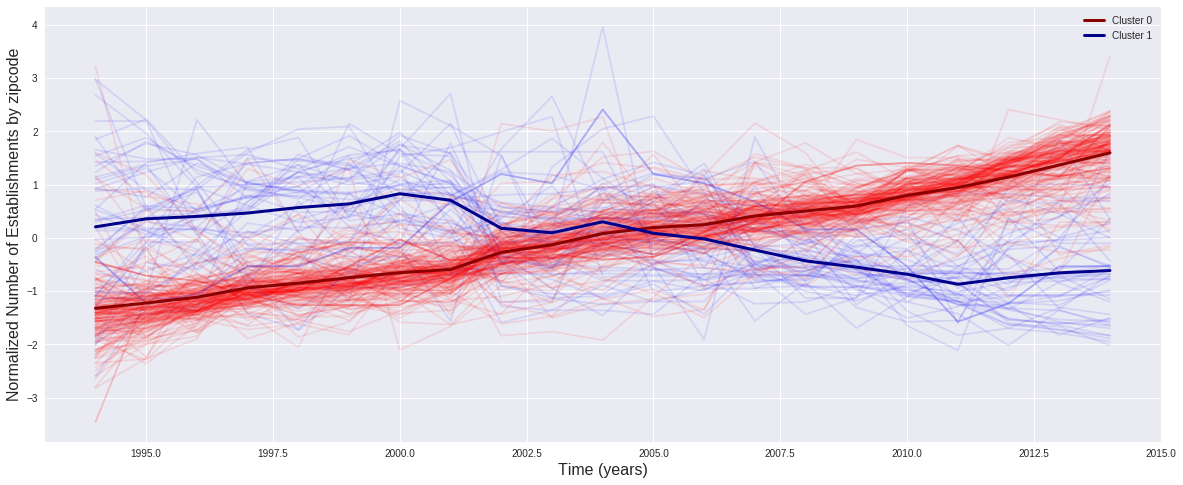

In [30]:
#Plotting figure
plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_2"].replace(color_map).iloc[i],alpha=0.1,label="")

plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_2"]==0].mean(axis=0),lw=3,label="Cluster 0",color="darkred")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_2"]==1].mean(axis=0),lw=3,label="Cluster 1",color="darkblue")

plt.legend()
plt.xlabel("Time (years)",fontsize=16);
plt.ylabel("Normalized Number of Establishments by zipcode",fontsize=16);
plt.legend()





Figure 1. Two clusters for time series for Number of Stablishments. There seems to be a pattern where one type goes up when the other goes down.

For three clusters:

In [31]:
n=3 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.

In [32]:
df_norm["K_labels_3"]=res.labels_

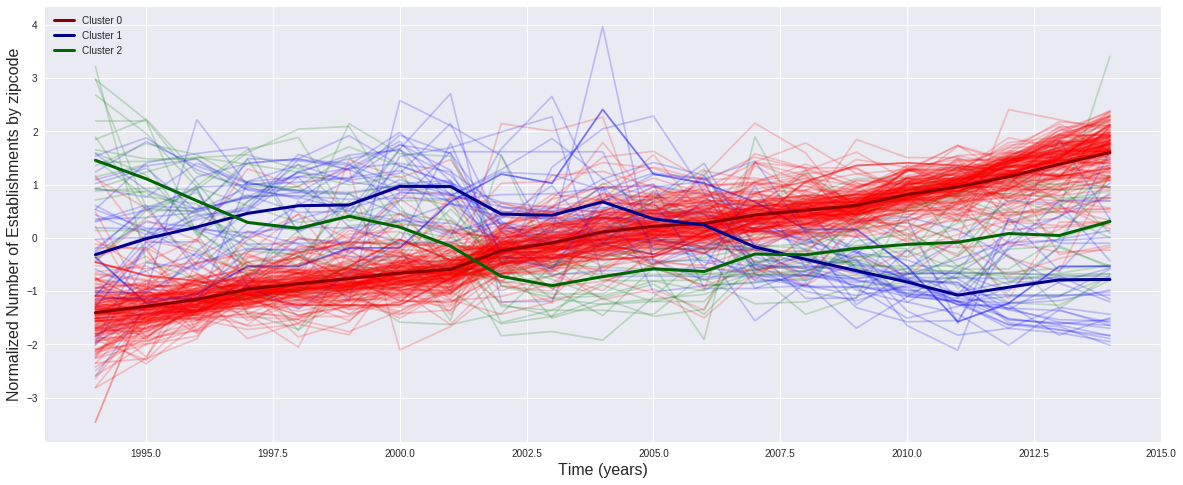

In [33]:
plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_3"].replace(color_map).iloc[i],alpha=0.2,label="")


plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==0].mean(axis=0),lw=3,label="Cluster 0",color="darkred")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==1].mean(axis=0),lw=3,label="Cluster 1",color="darkblue")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==2].mean(axis=0),lw=3,label="Cluster 2",color="darkgreen")
plt.xlabel("Time (years)",fontsize=16);
plt.ylabel("Normalized Number of Establishments by zipcode",fontsize=16);
plt.legend();



Figure 2. Three clusters for time series for Number of Stablishments. There seems to be a pattern where one type goes up when the other goes down. Same pattern as before, plus another group that goes down and more or less stabilizes.

For four clusters:

In [34]:
n=4 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)

df_norm["K_labels_4"]=res.labels_

In [35]:
df_norm["K_labels_4"].value_counts()

0    178
1     31
3     18
2     16
Name: K_labels_4, dtype: int64

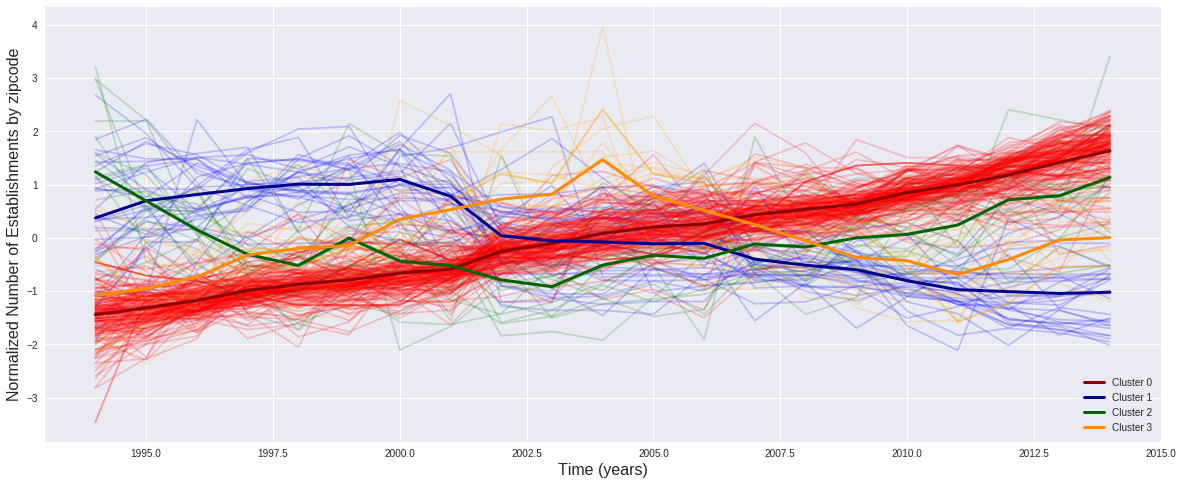

In [36]:
plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_4"].replace(color_map).iloc[i],alpha=0.2,label="")

plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==0].mean(axis=0),lw=3,label="Cluster 0",color="darkred")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==1].mean(axis=0),lw=3,label="Cluster 1",color="darkblue")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==2].mean(axis=0),lw=3,label="Cluster 2",color="darkgreen")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==3].mean(axis=0),lw=3,label="Cluster 3",color="darkorange")
plt.xlabel("Time (years)",fontsize=16);
plt.ylabel("Normalized Number of Establishments by zipcode",fontsize=16);
plt.legend()




Figure 3. Four clusters for time series for Number of Stablishments. Similar to the one before, but less easy to interpet. The author thinks that maybe this is not the best type of visualization. 

For 5 clusters:

In [37]:
n=5 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)

df_norm["K_labels_5"]=res.labels_

In [38]:
df_norm["K_labels_5"].value_counts()

2    129
0     49
3     31
1     18
4     16
Name: K_labels_5, dtype: int64

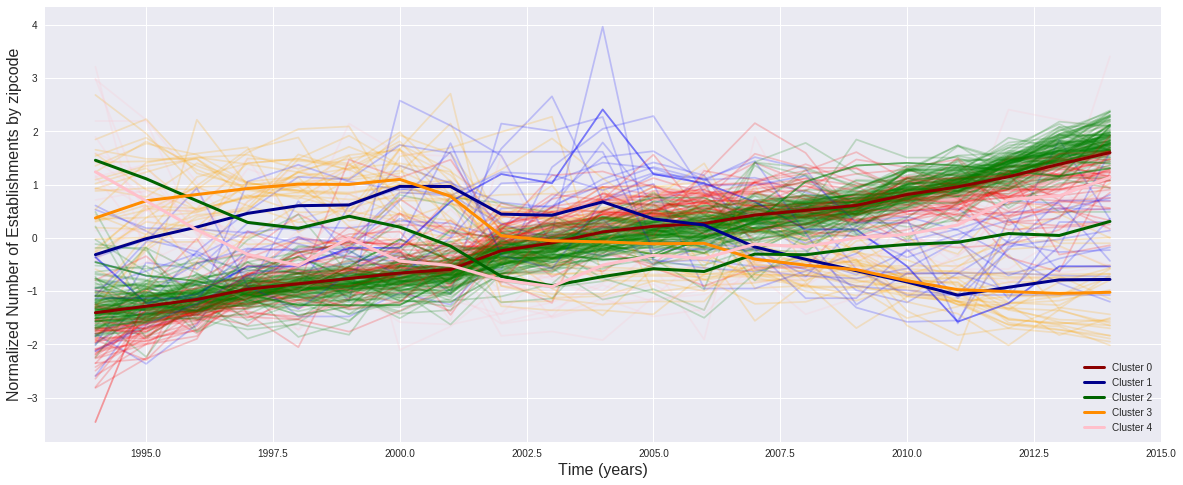

In [39]:
plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_5"].replace(color_map).iloc[i],alpha=0.2,label="")

plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==0].mean(axis=0),lw=3,label="Cluster 0",color="darkred")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==1].mean(axis=0),lw=3,label="Cluster 1",color="darkblue")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==2].mean(axis=0),lw=3,label="Cluster 2",color="darkgreen")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==3].mean(axis=0),lw=3,label="Cluster 3",color="darkorange")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==4].mean(axis=0),lw=3,label="Cluster 4",color="pink")
plt.xlabel("Time (years)",fontsize=16);
plt.ylabel("Normalized Number of Establishments by zipcode",fontsize=16);
plt.legend()



Figure 3. Five clusters for time series for Number of Stablishments. The pink (Cluster 4) one looks nice, similar to the cluster 0. Maybe with so many clusters, the patterns are not so distinguishable between one another. What is very evident is that ther is gone group that goes up while the others goes down.

Let's stop there. Instead of continuing doing one by one, we can try the elbow method:

In [40]:
#Original code taken from Stanislav Soboslesky - Applied Data Science Class

from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

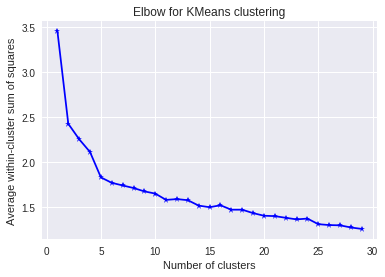

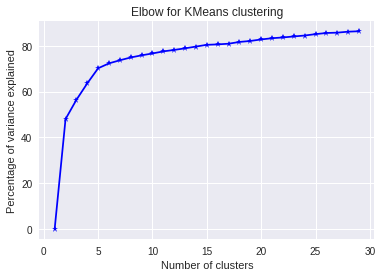

In [41]:
elbow(dd, range(1,30))

Figure 5. We can consider that 5 clusters seem to be an OK point to stop clustering.

We will graph those 5 clusters separted, more similar to what originally was in the notebook

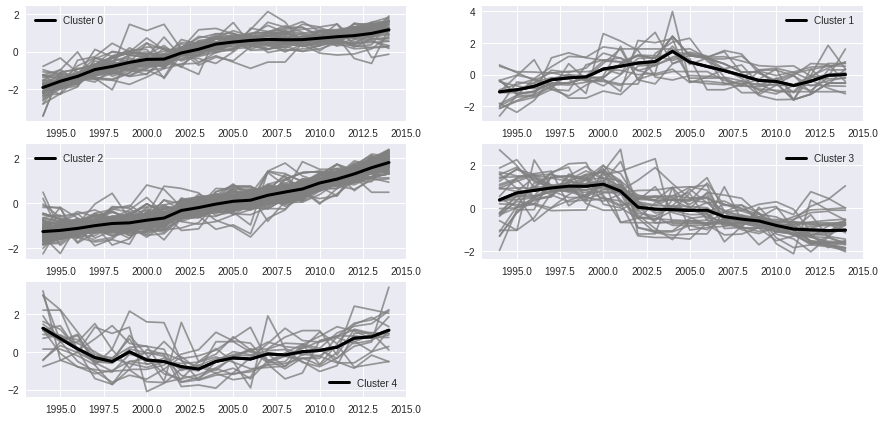

In [42]:
fig = plt.figure(figsize=(15,30))
for j in range(0,5):
    
    ax = fig.add_subplot(12,2,j+1)
    ax.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==j].mean(axis=0),lw=3,color="black")
    for i in range (0,len(df_norm[df_norm["K_labels_5"]==j].iloc[:,0:21])):
           ax.plot(df_norm[df_norm["K_labels_5"]==j].iloc[i,0:21],alpha=0.8,label="",color="grey")
    ax.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==j].mean(axis=0),lw=3,label="Cluster %d" % (j),color="black")
    plt.legend()
    

Figure 6. Five separate clusters. As mentioned before, 0 and 2 seem to go up, 3 down, 4 goes down and the up and cluster 1 more or less stable. The patterns are more or less different and seem to be experimenting different trends along the time series.

Now let's try another clustering method, like Agglomerative clustering

In [43]:
#Importing necessary packacge
from sklearn.cluster import AgglomerativeClustering


In [44]:
#Doing it for 5 clusters.
agc = AgglomerativeClustering(n_clusters=5,  compute_full_tree=True).fit(df_norm)
labelsag = agc.labels_

In [45]:
#Creating a new column with labels
df_norm["agglom"]=labelsag

### Chloropeths

In [46]:
#We will use Federica Bianco's function for chloropleth
import choroplethNYC as cp


In [47]:
#we will need zipcodes again, so we don't want them to be jsut and index
df_norm["zipcode"]=df_norm.index

In [48]:
#"We merge our normalized data set with the original shapefile to recover the location points
data_map=pd.merge(zips, df_norm, left_on="ZIPCODE",right_on="zipcode",how="inner")

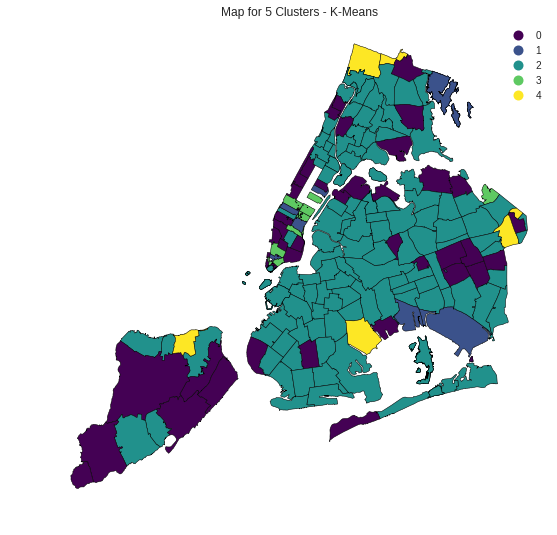

In [49]:
f, ax = plt.subplots(figsize=(9, 9))
data_map.plot(column='K_labels_5', categorical=True, 
        cmap='viridis', linewidth=0.5, ax=ax, 
       edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Map for 5 Clusters - K-Means");

Figure 7. cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster.

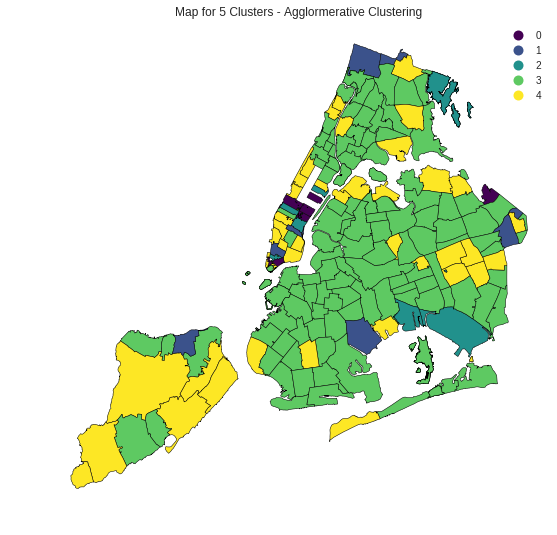

In [50]:
f, ax = plt.subplots(figsize=(9, 9))
data_map.plot(column='agglom', categorical=True, 
        cmap='viridis', linewidth=0.5, ax=ax, 
       edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Map for 5 Clusters - Agglormerative Clustering");

Figure 8. cloropleth of  cluster centers for **hierarchical agglomerative clustering**  clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster.

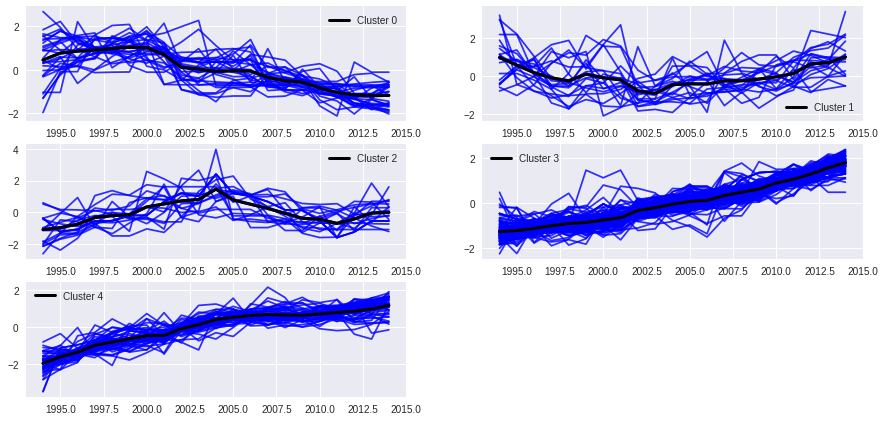

In [51]:
fig = plt.figure(figsize=(15,30))
for j in range(0,5):
    
    ax = fig.add_subplot(12,2,j+1)
    ax.plot(df_norm.iloc[:,0:21][df_norm["agglom"]==j].mean(axis=0),lw=3,color="blue")
    for i in range (0,len(df_norm[df_norm["agglom"]==j].iloc[:,0:21])):
           ax.plot(df_norm[df_norm["agglom"]==j].iloc[i,0:21],alpha=0.8,label="",color="blue")
    ax.plot(df_norm.iloc[:,0:21][df_norm["agglom"]==j].mean(axis=0),lw=3,label="Cluster %d" % (j),color="black")
    plt.legend()

Conclusion.

Both types of clustering, although they look different because of which color they assigned to each group, seem to show the same pattern when plotted over NYC.
We know that Cluster 4 and 3 (in Agglomerative) are the ones that experiment higher growth and 0 a decrease. 
I would like to have a better knowledge of new york city history, but brooklyn and queens seem to show increase in the number of business, probably, because in the economic revivial of NYC that made more people move to the City, higher demand made place to more business. 0 in midtown, may have experienced a decrease maybe due to higher prices or something like that? No idea. Anyway, is interesting to see that the majority of zipcodes experienced and increase while almost none experienced a decrease. An interesting way to evidence more economic growth. 